In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=Warning)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('./WineQT.csv')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [4]:
# printing total number of labels
np.unique(df['quality'])

array([3, 4, 5, 6, 7, 8])

<h3>It is a 6 class classification</h3>

In [5]:
# extract the important meaningful attributes
attb_df = df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]

In [6]:
attb_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


<h3>Data Preprocessing and Visualization</h3>

In [7]:
attb_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
dict_label = df['quality'].value_counts()

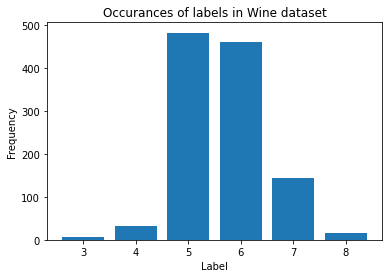

In [9]:
# plot a bar graph
dict_label = dict(dict_label)
plt.bar(list(dict_label.keys()),list(dict_label.values()))
plt.title('Occurances of labels in Wine dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

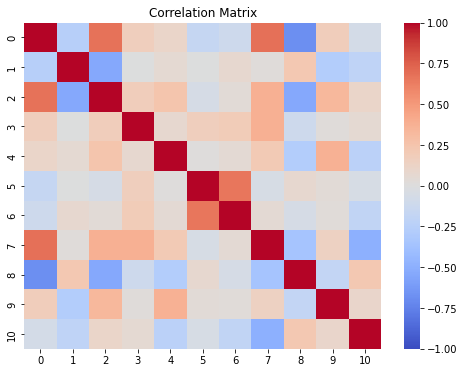

In [10]:
dataset = np.array(df)

"""
CHECK AGAIN BOOKMARK
"""

# Compute the correlation matrix using numpy
corr_matrix = np.corrcoef(dataset[:,:11], rowvar=False)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<h3>Observations : </h3>
<ol>
    <li>Features 3,4 look the best features since the correlation is less in non identity columns.</li>
</ol>

In [11]:
X = dataset[:,:11]
y = dataset[:,11]

# standardize
# calc z score for each entry columnwise
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

In [12]:
X.shape

(1143, 11)

In [13]:
# lets keep the split as train : 0.7, val : 0.1, test : 0.2
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

In [14]:
entries = dataset.shape[0]

train_X = X[:int(train_ratio*entries)]
val_X = X[int(train_ratio*entries):int((train_ratio+val_ratio)*entries)]
test_X = X[int((train_ratio+val_ratio)*entries):]

In [15]:
train_y = y[:int(train_ratio*entries)]
val_y = y[int(train_ratio*entries):int((train_ratio+val_ratio)*entries)]
test_y = y[int((train_ratio+val_ratio)*entries):]

In [16]:
train_X.shape

(914, 11)

In [17]:
train_y.shape

(914,)

<h2>Multinomial Logistic regression class</h2>

In [22]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import wandb

class MultinomialLogisticRegression:
    def __init__(self,features=11,output_labels=6):
        self.parameters = np.random.rand(features+1,output_labels)
        self.learning_rate = 0.001
    def cross_entropy_loss(self, y_true, y_pred):
        lower_bound = 1e-15 
        y_pred = np.clip(y_pred, lower_bound, 1 - lower_bound)
        loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        return loss
    
    def softmax(self,x):
        return np.exp(x)/np.sum(np.exp(x),axis=1).reshape((-1,1))
    
    def gradient_descent(self,X,y_true,y_pred):
        multiplier = (y_pred-y_true)
        added_bias = np.hstack([X,np.ones((X.shape[0],1))])
        outer_product = added_bias.T @ multiplier
        self.parameters -= self.learning_rate*outer_product
        

    def fit(self, X_train, y_train, X_val, y_val,num_epochs=2000):
        added_bias = np.hstack([X_train,np.ones((X_train.shape[0],1))])
        added_bias_val = np.hstack([X_val,np.ones((X_val.shape[0],1))])
        
        y_train = y_train.reshape((-1,1))
        one_hot_encoder = OneHotEncoder(sparse_output=False)
        y_true = one_hot_encoder.fit_transform(y_train)
        
        y_val = y_val.reshape((-1,1))
        one_hot_encoder = OneHotEncoder(sparse_output=False)
        y_true_val = one_hot_encoder.fit_transform(y_val)
        
        train_accuracy = []
        val_acc = []
        
        train_loss = []
        val_loss = []
        
        for epoch in range(num_epochs):
            
            # Predict
            y_pred =  self.softmax(added_bias @ self.parameters)
            predicted_classes = np.argmax(y_pred,axis=1) + 3 # to get the exact labels
            predicted_classes = predicted_classes.flatten()
            
            # val set
            y_pred_val =  self.softmax(added_bias_val @ self.parameters)
            val_predicted_classes = np.argmax(y_pred_val,axis=1) + 3 # to get the exact labels
            val_predicted_classes = val_predicted_classes.flatten()
    
            # Compute training accuracy and loss
            train_acc = accuracy_score(y_train, predicted_classes)
            train_accuracy.append(train_acc)
            tr_loss = self.cross_entropy_loss(y_true,y_pred)
            train_loss.append(tr_loss)
            
            
            # Compute validation metrics
            valid_report = classification_report(y_val,val_predicted_classes)
            
            v_loss = self.cross_entropy_loss(y_true_val,y_pred_val)
            val_loss.append(v_loss)
            valid_acc = accuracy_score(y_val, val_predicted_classes)
            val_acc.append(valid_acc)
            
            if (epoch+1)%50==0:
                # Print metrics
                print(f"Epoch {epoch+1}/{num_epochs}")
                print("-------------------------")
                print(f"Train Loss: {tr_loss:.4f}")
                print(f"Train Accuracy: {train_acc:.4f}")
                print(f"\nValidation Accuracy: {valid_acc:.4f}")
                wandb.log({"train_accuracy" : train_acc,"train_loss":tr_loss,"val_accuracy":valid_acc,"val_loss":v_loss})
            
            if (epoch+1 == num_epochs):
                print("\nValidation Classification Report:")
                print(valid_report)
                print("-------------------------\n")
    
            self.gradient_descent(X_train,y_true,y_pred)
        return train_accuracy,val_acc,train_loss,val_loss
        
    def predict(self,X):
        added_bias = np.hstack([X,np.ones((X.shape[0],1))])
        y_pred =  self.softmax(added_bias @ self.parameters)
        predicted_classes = np.argmax(y_pred,axis=1) + 3 # to get the exact labels
        predicted_classes = predicted_classes.flatten()
        
        return predicted_classes

In [23]:
logistic= MultinomialLogisticRegression(features=11,output_labels=6)

<h3>Classificaton Report</h3>

In [24]:
# import wandb
wandb.init(project="smai-ass3-part1-LR")

tr_acc,val_acc,tr_loss,val_loss = logistic.fit(train_X,train_y,val_X,val_y)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Epoch 50/2000
-------------------------
Train Loss: 0.9278
Train Accuracy: 0.6193

Validation Accuracy: 0.7018
Epoch 100/2000
-------------------------
Train Loss: 0.9141
Train Accuracy: 0.6149

Validation Accuracy: 0.6842
Epoch 150/2000
-------------------------
Train Loss: 0.9090
Train Accuracy: 0.6127

Validation Accuracy: 0.6930
Epoch 200/2000
-------------------------
Train Loss: 0.9061
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 250/2000
-------------------------
Train Loss: 0.9042
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 300/2000
-------------------------
Train Loss: 0.9028
Train Accuracy: 0.6138

Validation Accuracy: 0.6930
Epoch 350/2000
-------------------------
Train Loss: 0.9016
Train Accuracy: 0.6138

Validation Accuracy: 0.6930
Epoch 400/2000
-------------------------
Train Loss: 0.9007
Train Accuracy: 0.6160

Validation Accuracy: 0.6930
Epoch 450/2000
-------------------------
Train Loss: 0.9000
Train Accuracy: 0.6160

Validation Accuracy: 

<h3>Test Data Accuracy</h3>

In [21]:
pred_val = logistic.predict(test_X)
test_y = test_y.flatten()

print(test_y.shape)
print(np.sum(test_y==pred_val)/test_y.shape[0])

(115,)
0.6086956521739131


In [22]:
# classification report
valid_report = classification_report(test_y,pred_val)
print(valid_report)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         3
         5.0       0.68      0.60      0.64        47
         6.0       0.57      0.83      0.68        47
         7.0       0.50      0.23      0.32        13
         8.0       0.00      0.00      0.00         2

    accuracy                           0.61       115
   macro avg       0.29      0.28      0.27       115
weighted avg       0.57      0.61      0.57       115



<h3>Plotting comparisions</h3>

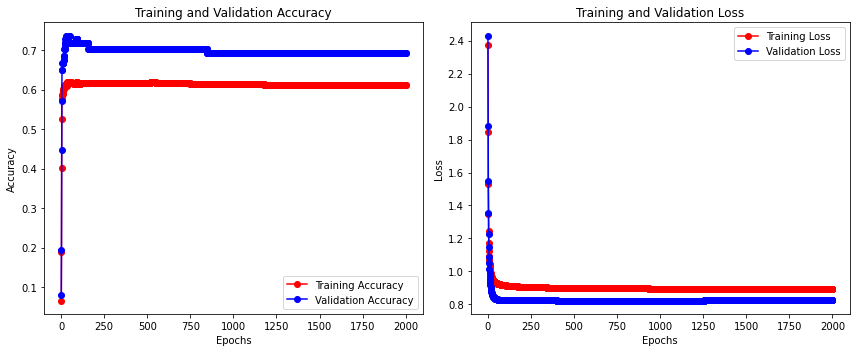

In [23]:
# Setting the epochs based on the length of the lists
epochs = range(1, len(tr_acc) + 1)

# Plotting accuracies
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs, tr_acc, 'ro-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'bo-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting losses
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs, tr_loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'bo-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # To ensure no overlap between the two plots
plt.show()

<h3>Using Wandb</h3>

In [24]:
import wandb
wandb.init(project="smai-ass3-part1-LR")

def mean(numbers):
    return (sum(numbers) / len(numbers))

for learning_rate in [0.0005,0.001,0.002,0.005,0.01]:
    for epochs in [500,1000,2000,4000]:
        logistic= MultinomialLogisticRegression(features=11,output_labels=6)
        logistic.learning_rate = learning_rate
        tr_acc,val_acc,tr_loss,val_loss = logistic.fit(train_X,train_y,val_X,val_y,num_epochs=epochs)
        
        wandb.log({"Train_accuracy":mean(tr_acc) , "Validation_accuracy":mean(val_acc) , "Train_loss": mean(tr_loss), "Validation_loss" : mean(val_loss), "Hyperparameters" : {"epcohs":epochs,"learning_rate":learning_rate} })

wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Epoch 50/500
-------------------------
Train Loss: 0.9537
Train Accuracy: 0.6160

Validation Accuracy: 0.7193
Epoch 100/500
-------------------------
Train Loss: 0.9273
Train Accuracy: 0.6083

Validation Accuracy: 0.7281
Epoch 150/500
-------------------------
Train Loss: 0.9184
Train Accuracy: 0.6138

Validation Accuracy: 0.7281
Epoch 200/500
-------------------------
Train Loss: 0.9137
Train Accuracy: 0.6138

Validation Accuracy: 0.7281
Epoch 250/500
-------------------------
Train Loss: 0.9108
Train Accuracy: 0.6149

Validation Accuracy: 0.7281
Epoch 300/500
-------------------------
Train Loss: 0.9087
Train Accuracy: 0.6138

Validation Accuracy: 0.7281
Epoch 350/500
-------------------------
Train Loss: 0.9071
Train Accuracy: 0.6149

Validation Accuracy: 0.7193
Epoch 400/500
-------------------------
Train Loss: 0.9058
Train Accuracy: 0.6149

Validation Accuracy: 0.7105
Epoch 450/500
-------------------------
Train Loss: 0.9048
Train Accuracy: 0.6127

Validation Accuracy: 0.6930
Ep

Epoch 1750/2000
-------------------------
Train Loss: 0.8964
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 1800/2000
-------------------------
Train Loss: 0.8963
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 1850/2000
-------------------------
Train Loss: 0.8962
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 1900/2000
-------------------------
Train Loss: 0.8961
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 1950/2000
-------------------------
Train Loss: 0.8960
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 2000/2000
-------------------------
Train Loss: 0.8958
Train Accuracy: 0.6138

Validation Accuracy: 0.6930

Validation Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         1
         5.0       0.82      0.70      0.75        57
         6.0       0.64      0.75      0.69        51
         7.0    

Epoch 3150/4000
-------------------------
Train Loss: 0.8942
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 3200/4000
-------------------------
Train Loss: 0.8941
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 3250/4000
-------------------------
Train Loss: 0.8941
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 3300/4000
-------------------------
Train Loss: 0.8940
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 3350/4000
-------------------------
Train Loss: 0.8940
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 3400/4000
-------------------------
Train Loss: 0.8939
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 3450/4000
-------------------------
Train Loss: 0.8939
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 3500/4000
-------------------------
Train Loss: 0.8938
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 3550/4000
-------------------------
Train Loss: 0.8938
Train Accuracy: 0.6116

Validation 

Epoch 550/2000
-------------------------
Train Loss: 0.8988
Train Accuracy: 0.6160

Validation Accuracy: 0.7018
Epoch 600/2000
-------------------------
Train Loss: 0.8983
Train Accuracy: 0.6160

Validation Accuracy: 0.7018
Epoch 650/2000
-------------------------
Train Loss: 0.8978
Train Accuracy: 0.6160

Validation Accuracy: 0.7018
Epoch 700/2000
-------------------------
Train Loss: 0.8974
Train Accuracy: 0.6160

Validation Accuracy: 0.7018
Epoch 750/2000
-------------------------
Train Loss: 0.8971
Train Accuracy: 0.6160

Validation Accuracy: 0.6930
Epoch 800/2000
-------------------------
Train Loss: 0.8968
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 850/2000
-------------------------
Train Loss: 0.8965
Train Accuracy: 0.6149

Validation Accuracy: 0.6930
Epoch 900/2000
-------------------------
Train Loss: 0.8962
Train Accuracy: 0.6138

Validation Accuracy: 0.6930
Epoch 950/2000
-------------------------
Train Loss: 0.8960
Train Accuracy: 0.6138

Validation Accuracy:

Epoch 2000/4000
-------------------------
Train Loss: 0.8934
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 2050/4000
-------------------------
Train Loss: 0.8933
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 2100/4000
-------------------------
Train Loss: 0.8933
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 2150/4000
-------------------------
Train Loss: 0.8932
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 2200/4000
-------------------------
Train Loss: 0.8931
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 2250/4000
-------------------------
Train Loss: 0.8931
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 2300/4000
-------------------------
Train Loss: 0.8930
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 2350/4000
-------------------------
Train Loss: 0.8930
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 2400/4000
-------------------------
Train Loss: 0.8929
Train Accuracy: 0.6105

Validation 

Epoch 700/1000
-------------------------
Train Loss: 0.8946
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 750/1000
-------------------------
Train Loss: 0.8944
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 800/1000
-------------------------
Train Loss: 0.8942
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 850/1000
-------------------------
Train Loss: 0.8940
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 900/1000
-------------------------
Train Loss: 0.8938
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 950/1000
-------------------------
Train Loss: 0.8936
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 1000/1000
-------------------------
Train Loss: 0.8935
Train Accuracy: 0.6105

Validation Accuracy: 0.6930

Validation Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         1
         5.0     

Epoch 900/4000
-------------------------
Train Loss: 0.8938
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 950/4000
-------------------------
Train Loss: 0.8936
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 1000/4000
-------------------------
Train Loss: 0.8934
Train Accuracy: 0.6116

Validation Accuracy: 0.6930
Epoch 1050/4000
-------------------------
Train Loss: 0.8933
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 1100/4000
-------------------------
Train Loss: 0.8932
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 1150/4000
-------------------------
Train Loss: 0.8930
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 1200/4000
-------------------------
Train Loss: 0.8929
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 1250/4000
-------------------------
Train Loss: 0.8928
Train Accuracy: 0.6105

Validation Accuracy: 0.6930
Epoch 1300/4000
-------------------------
Train Loss: 0.8927
Train Accuracy: 0.6105

Validation Ac

Epoch 350/500
-------------------------
Train Loss: 1.7041
Train Accuracy: 0.4902

Validation Accuracy: 0.5351
Epoch 400/500
-------------------------
Train Loss: 1.7034
Train Accuracy: 0.4902

Validation Accuracy: 0.5351
Epoch 450/500
-------------------------
Train Loss: 1.7029
Train Accuracy: 0.4902

Validation Accuracy: 0.5351
Epoch 500/500
-------------------------
Train Loss: 1.7024
Train Accuracy: 0.4902

Validation Accuracy: 0.5351

Validation Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         1
         5.0       0.69      0.44      0.54        57
         6.0       0.53      0.69      0.60        51
         7.0       0.11      0.33      0.17         3
         8.0       0.00      0.00      0.00         1

    accuracy                           0.54       114
   macro avg       0.22      0.24      0.22       114
weighted avg       0.59      0.54

Epoch 50/4000
-------------------------
Train Loss: 1.6022
Train Accuracy: 0.5153

Validation Accuracy: 0.5000
Epoch 100/4000
-------------------------
Train Loss: 1.5970
Train Accuracy: 0.5153

Validation Accuracy: 0.5000
Epoch 150/4000
-------------------------
Train Loss: 1.5958
Train Accuracy: 0.5153

Validation Accuracy: 0.5000
Epoch 200/4000
-------------------------
Train Loss: 1.5953
Train Accuracy: 0.5153

Validation Accuracy: 0.5088
Epoch 250/4000
-------------------------
Train Loss: 1.5951
Train Accuracy: 0.5164

Validation Accuracy: 0.5088
Epoch 300/4000
-------------------------
Train Loss: 1.5949
Train Accuracy: 0.5164

Validation Accuracy: 0.5088
Epoch 350/4000
-------------------------
Train Loss: 1.5947
Train Accuracy: 0.5186

Validation Accuracy: 0.5088
Epoch 400/4000
-------------------------
Train Loss: 1.5945
Train Accuracy: 0.5186

Validation Accuracy: 0.5088
Epoch 450/4000
-------------------------
Train Loss: 1.5943
Train Accuracy: 0.5175

Validation Accuracy: 

Epoch 3750/4000
-------------------------
Train Loss: 1.5892
Train Accuracy: 0.5175

Validation Accuracy: 0.5088
Epoch 3800/4000
-------------------------
Train Loss: 1.5891
Train Accuracy: 0.5175

Validation Accuracy: 0.5088
Epoch 3850/4000
-------------------------
Train Loss: 1.5891
Train Accuracy: 0.5175

Validation Accuracy: 0.5088
Epoch 3900/4000
-------------------------
Train Loss: 1.5891
Train Accuracy: 0.5175

Validation Accuracy: 0.5088
Epoch 3950/4000
-------------------------
Train Loss: 1.5890
Train Accuracy: 0.5175

Validation Accuracy: 0.5088
Epoch 4000/4000
-------------------------
Train Loss: 1.5890
Train Accuracy: 0.5175

Validation Accuracy: 0.5088

Validation Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         1
         5.0       0.58      0.79      0.67        57
         6.0       0.50      0.25      0.34        51
         7.0    

Epoch 1150/2000
-------------------------
Train Loss: 3.2738
Train Accuracy: 0.4683

Validation Accuracy: 0.5263
Epoch 1200/2000
-------------------------
Train Loss: 3.2739
Train Accuracy: 0.4683

Validation Accuracy: 0.5263
Epoch 1250/2000
-------------------------
Train Loss: 3.2740
Train Accuracy: 0.4683

Validation Accuracy: 0.5263
Epoch 1300/2000
-------------------------
Train Loss: 3.2741
Train Accuracy: 0.4683

Validation Accuracy: 0.5263
Epoch 1350/2000
-------------------------
Train Loss: 3.2743
Train Accuracy: 0.4683

Validation Accuracy: 0.5263
Epoch 1400/2000
-------------------------
Train Loss: 3.2744
Train Accuracy: 0.4683

Validation Accuracy: 0.5263
Epoch 1450/2000
-------------------------
Train Loss: 3.2745
Train Accuracy: 0.4683

Validation Accuracy: 0.5263
Epoch 1500/2000
-------------------------
Train Loss: 3.2747
Train Accuracy: 0.4683

Validation Accuracy: 0.5263
Epoch 1550/2000
-------------------------
Train Loss: 3.2748
Train Accuracy: 0.4683

Validation 

Epoch 2550/4000
-------------------------
Train Loss: 2.9921
Train Accuracy: 0.5022

Validation Accuracy: 0.4825
Epoch 2600/4000
-------------------------
Train Loss: 2.9919
Train Accuracy: 0.5022

Validation Accuracy: 0.4825
Epoch 2650/4000
-------------------------
Train Loss: 2.9916
Train Accuracy: 0.5022

Validation Accuracy: 0.4825
Epoch 2700/4000
-------------------------
Train Loss: 2.9914
Train Accuracy: 0.5022

Validation Accuracy: 0.4825
Epoch 2750/4000
-------------------------
Train Loss: 2.9912
Train Accuracy: 0.5022

Validation Accuracy: 0.4825
Epoch 2800/4000
-------------------------
Train Loss: 2.9910
Train Accuracy: 0.5033

Validation Accuracy: 0.4825
Epoch 2850/4000
-------------------------
Train Loss: 2.9909
Train Accuracy: 0.5033

Validation Accuracy: 0.4825
Epoch 2900/4000
-------------------------
Train Loss: 2.9907
Train Accuracy: 0.5033

Validation Accuracy: 0.4825
Epoch 2950/4000
-------------------------
Train Loss: 2.9905
Train Accuracy: 0.5033

Validation 

In [25]:
wandb.finish()

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Train_accuracy,████████████▂▂▂▂▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃████
Validation_accuracy,███▇▇▇▇▇█▇▇▇▂▂▂▂▁▁▁▁
Validation_loss,▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃████
Train_accuracy,0.48542
Train_loss,3.13703
Validation_accuracy,0.50418
Validation_loss,3.26219
